In [1]:
import pybedtools
import pyranges

gencode = pyranges.read_gtf("../data/gencode.v40.basic.annotation.gtf")
gm12878_chromatin_states = pybedtools.BedTool("../data/rnaseq/ENCFF338RIC.bed").to_dataframe()
h1esc_chromatin_states = pybedtools.BedTool("../data/rnaseq/ENCFF323HNB.bed").to_dataframe()
hffc6_chromatin_states = pybedtools.BedTool("../data/rnaseq/ENCFF393FSC.bed").to_dataframe()

active_gene_states = ['TssA', 'TssAFlnk', 'TxFlnk', 'Tx', 'TxWk', 'EnhG', 'EnhG1', 'EnhG2', 'Enh', 'EnhA1', 'EnhA2']

In [2]:
# cut .xx postfix from gene_id
# gencode['gene_id'] = gencode['gene_id'].str.split('.')[0]
genes_from_gencode = (
    gencode
    [(gencode['Feature'] == 'gene') & (gencode['gene_type'] == 'protein_coding')]
    [['Chromosome', 'Start', 'End', 'gene_id']]
)

genes_from_gencode['gene_id'] = genes_from_gencode['gene_id'].str.split('.').str[0]

genes_from_gencode

,Chromosome,Start,End,gene_id
54,chr1,65418,71585,ENSG00000186092
176,chr1,450739,451678,ENSG00000284733
241,chr1,685715,686654,ENSG00000284662
454,chr1,923922,944575,ENSG00000187634
554,chr1,944202,959309,ENSG00000188976
...,...,...,...,...
1926870,chrM,10469,10766,ENSG00000212907
1926877,chrM,10759,12137,ENSG00000198886
1926891,chrM,12336,14148,ENSG00000198786
1926897,chrM,14148,14673,ENSG00000198695


In [3]:
import pandas as pd

distances_with_links_exp4 = pd.read_parquet("./links/experiment_4/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)
distances_with_links_exp5 = pd.read_parquet("./links/experiment_5/distances_with_links.parquet").rename({"dist_avg_dist": "avg_dist"}, axis=1)
distances_with_links = pd.concat([distances_with_links_exp4, distances_with_links_exp5], ignore_index=True)

gm12878_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'GM12878']
hffc6_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'HFFC6']
h1esc_neanderthal_df_ref = distances_with_links[distances_with_links['cell_line'] == 'H1ESC']

In [4]:
distance_cutoff = {
    'H1ESC_Nean': 1.5819487888988626,
    'H1ESC_Deni': 1.5940225214185284,
    'HFFC6_Nean': 1.4982763183612486,
    'HFFC6_Deni': 1.7777412978743463,
    'WTC11_Nean': 0.49185075802354294,
    'WTC11_Deni': 0.49946283771094635,
    'GM12878_Nean': 1.3194976373807719,
    'GM12878_Deni': 1.2678860440889042
}

gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["avg_dist"] > distance_cutoff["GM12878_Nean"]]
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["avg_dist"] > distance_cutoff["HFFC6_Nean"]]
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["avg_dist"] > distance_cutoff["H1ESC_Nean"]]

In [5]:
gm12878_neanderthal_df_ref = (
    gm12878_neanderthal_df_ref
    .merge(genes_from_gencode, left_on='gene_id', right_on='gene_id', how='left', suffixes=('', '_gene'))
    .rename({'Chromosome': 'gene_chromosome', 'Start': 'gene_start', 'End': 'gene_end'}, axis=1)
)
gm12878_neanderthal_df_ref[['enh_chromosome', 'enh_start', 'enh_end']] = gm12878_neanderthal_df_ref['enh_id'].str.split(':|-', expand=True)
gm12878_neanderthal_df_ref['enh_start'] = gm12878_neanderthal_df_ref['enh_start'].astype(int)
gm12878_neanderthal_df_ref['enh_end'] = gm12878_neanderthal_df_ref['enh_end'].astype(int)

hffc6_neanderthal_df_ref = (
    hffc6_neanderthal_df_ref
    .merge(genes_from_gencode, left_on='gene_id', right_on='gene_id', how='left', suffixes=('', '_gene'))
    .rename({'Chromosome': 'gene_chromosome', 'Start': 'gene_start', 'End': 'gene_end'}, axis=1)
)
hffc6_neanderthal_df_ref[['enh_chromosome', 'enh_start', 'enh_end']] = hffc6_neanderthal_df_ref['enh_id'].str.split(':|-', expand=True)
hffc6_neanderthal_df_ref['enh_start'] = hffc6_neanderthal_df_ref['enh_start'].astype(int)
hffc6_neanderthal_df_ref['enh_end'] = hffc6_neanderthal_df_ref['enh_end'].astype(int)

h1esc_neanderthal_df_ref = (
    h1esc_neanderthal_df_ref
    .merge(genes_from_gencode, left_on='gene_id', right_on='gene_id', how='left', suffixes=('', '_gene'))
    .rename({'Chromosome': 'gene_chromosome', 'Start': 'gene_start', 'End': 'gene_end'}, axis=1)
)
h1esc_neanderthal_df_ref[['enh_chromosome', 'enh_start', 'enh_end']] = h1esc_neanderthal_df_ref['enh_id'].str.split(':|-', expand=True)
h1esc_neanderthal_df_ref['enh_start'] = h1esc_neanderthal_df_ref['enh_start'].astype(int)
h1esc_neanderthal_df_ref['enh_end'] = h1esc_neanderthal_df_ref['enh_end'].astype(int)

In [6]:
def mark_active_regions(df, chromatin_states_df, active_gene_states):
    active_regions_pr = pyranges.PyRanges(
        {
            "Chromosome": chromatin_states_df['chrom'][chromatin_states_df['name'].isin(active_gene_states)],
            "Start": chromatin_states_df['start'][chromatin_states_df['name'].isin(active_gene_states)],
            "End": chromatin_states_df['end'][chromatin_states_df['name'].isin(active_gene_states)]
        }
    )

    genes_pr = pyranges.PyRanges(
        {
            "Chromosome": df['gene_chromosome'],
            "Start": df['gene_start'],
            "End": df['gene_end'],
            "row_id": df.index
        }
    )

    enhancers_pr = pyranges.PyRanges(
        {
            "Chromosome": df['enh_chromosome'],
            "Start": df['enh_start'],
            "End": df['enh_end'],
            "row_id": df.index
        }
    )

    active_genes = genes_pr.intersect(active_regions_pr)
    active_enhancers = enhancers_pr.intersect(active_regions_pr)

    active_gene_rows = set(active_genes['row_id']) if not active_genes.empty else set()
    active_enhancer_rows = set(active_enhancers['row_id']) if not active_enhancers.empty else set()

    active_rows = active_gene_rows.intersection(active_enhancer_rows)

    result_df = df.copy()
    result_df['is_active'] = result_df.index.isin(active_rows)

    return result_df

gm12878_neanderthal_df_ref = mark_active_regions(gm12878_neanderthal_df_ref, gm12878_chromatin_states, active_gene_states)
gm12878_neanderthal_df_ref = gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref['is_active']].drop(columns=['is_active'])

hffc6_neanderthal_df_ref = mark_active_regions(hffc6_neanderthal_df_ref, hffc6_chromatin_states, active_gene_states)
hffc6_neanderthal_df_ref = hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref['is_active']].drop(columns=['is_active'])

h1esc_neanderthal_df_ref = mark_active_regions(h1esc_neanderthal_df_ref, h1esc_chromatin_states, active_gene_states)
h1esc_neanderthal_df_ref = h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref['is_active']].drop(columns=['is_active'])

In [7]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

with open("../data/rnaseq/gm12878_read_count.txt", "r") as f:
    f.readline()
    gm12878_counts_df = pd.read_csv(f, index_col=0, sep="\t")


with open("../data/rnaseq/h1esc_read_count.txt", "r") as f:
    f.readline()
    h1esc_counts_df = pd.read_csv(f, index_col=0, sep="\t")

with open("../data/rnaseq/hffc6_read_count.txt", "r") as f:
    f.readline()
    hffc6_counts_df = pd.read_csv(f, index_col=0, sep="\t")

gm12878_counts_df = gm12878_counts_df[['ENCFF800HIP.filtered.bam', 'ENCFF991KKX.filtered.bam']].T
h1esc_counts_df = h1esc_counts_df[['ENCFF675NTU.filtered.bam', 'ENCFF379NOY.filtered.bam']].T
hffc6_counts_df = hffc6_counts_df[['ENCFF307KUI.filtered.bam', 'ENCFF294BSI.filtered.bam', 'ENCFF937TEI.filtered.bam']].T

def compute_deseq_stats_for_2_celllines(cellline1_counts_df, cellline2_counts_df, cellline1_name="CellLine1", cellline2_name="CellLine2"):
    cl1_vs_cl2_counts_df = pd.concat(
        [cellline1_counts_df, cellline2_counts_df]
    )

    cl1_vs_cl2_metadata_df = pd.DataFrame(
        {
            "condition": [cellline1_name] * cellline1_counts_df.shape[0] + [cellline2_name] * cellline2_counts_df.shape[0]
        },
        index=cl1_vs_cl2_counts_df.index,
    )

    inference = DefaultInference(n_cpus=8)
    dds = DeseqDataSet(
        counts=cl1_vs_cl2_counts_df,
        metadata=cl1_vs_cl2_metadata_df,
        design="~condition",
        refit_cooks=True,
        inference=inference,
    )

    dds.deseq2()
    stats = DeseqStats(dds, contrast=["condition", cellline2_name, cellline1_name])
    stats.summary()

    results_df = stats.results_df.dropna()
    results_df['symbol'] = results_df.index
    return results_df

gm12878_vs_h1esc_results_df = compute_deseq_stats_for_2_celllines(
    gm12878_counts_df,
    h1esc_counts_df,
    cellline1_name="GM12878",
    cellline2_name="H1ESC"
)

h1esc_vs_hffc6_results_df = compute_deseq_stats_for_2_celllines(
    h1esc_counts_df,
    hffc6_counts_df,
    cellline1_name="H1ESC",
    cellline2_name="HFFC6"
)

hffc6_vs_gm12878_results_df = compute_deseq_stats_for_2_celllines(
    hffc6_counts_df,
    gm12878_counts_df,
    cellline1_name="HFFC6",
    cellline2_name="GM12878"
)

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.07 seconds.

Fitting dispersion trend curve...
... done in 0.33 seconds.

/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pydeseq2/dds.py:542: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 1.40 seconds.

Fitting LFCs...
... done in 1.42 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.28 seconds.

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/2862106465.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

Log2 fold change & Wald test p-value: condition H1ESC vs GM12878
                       baseMean  log2FoldChange     lfcSE      stat  \
Geneid                                                                
ENSG00000223972.5      0.000000             NaN       NaN       NaN   
ENSG00000227232.5      0.000000             NaN       NaN       NaN   
ENSG00000278267.1      2.248036        0.506469  1.823320  0.277773   
ENSG00000243485.5      0.000000             NaN       NaN       NaN   
ENSG00000284332.1      0.000000             NaN       NaN       NaN   
...                         ...             ...       ...       ...   
ENSG00000198695.2   2048.736260        0.437514  0.086208  5.075096   
ENSG00000210194.1     23.651924       -0.576258  0.577638 -0.997612   
ENSG00000198727.2  38697.120986       -0.371529  0.058147 -6.389494   
ENSG00000210195.2     89.769900       -1.306326  0.306061 -4.268188   
ENSG00000210196.2     98.976794       -0.069780  0.282614 -0.246908   

           

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.11 seconds.

Fitting dispersion trend curve...
... done in 0.34 seconds.

/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pydeseq2/dds.py:542: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 1.54 seconds.

Fitting LFCs...
... done in 1.05 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 1.34 seconds.

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/2862106465.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re

Log2 fold change & Wald test p-value: condition HFFC6 vs H1ESC
                       baseMean  log2FoldChange     lfcSE      stat  \
Geneid                                                                
ENSG00000223972.5      0.000000             NaN       NaN       NaN   
ENSG00000227232.5      4.548690        5.383865  2.586318  2.081671   
ENSG00000278267.1      1.372396       -1.891656  2.006040 -0.942980   
ENSG00000243485.5      0.000000             NaN       NaN       NaN   
ENSG00000284332.1      0.000000             NaN       NaN       NaN   
...                         ...             ...       ...       ...   
ENSG00000198695.2   1669.869168       -0.718368  0.150894 -4.760729   
ENSG00000210194.1     12.167266       -1.037633  0.679102 -1.527948   
ENSG00000198727.2  25784.760948       -0.497953  0.193864 -2.568560   
ENSG00000210195.2    106.491115        1.604338  0.280161  5.726478   
ENSG00000210196.2     64.532522       -0.902914  0.328352 -2.749838   

             

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 1.12 seconds.

Fitting dispersion trend curve...
... done in 0.32 seconds.

/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pydeseq2/dds.py:542: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 1.47 seconds.

Fitting LFCs...
... done in 1.02 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...


Log2 fold change & Wald test p-value: condition GM12878 vs HFFC6
                       baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                          
ENSG00000223972.5      0.000000             NaN       NaN       NaN       NaN   
ENSG00000227232.5      4.876008       -5.631698  2.581318 -2.181715  0.029131   
ENSG00000278267.1      1.138906        1.341493  2.194531  0.611289  0.541008   
ENSG00000243485.5      0.000000             NaN       NaN       NaN       NaN   
ENSG00000284332.1      0.000000             NaN       NaN       NaN       NaN   
...                         ...             ...       ...       ...       ...   
ENSG00000198695.2   1520.630326        0.231177  0.157710  1.465835  0.142693   
ENSG00000210194.1     16.391290        1.564962  0.603404  2.593556  0.009499   
ENSG00000198727.2  30956.220844        0.819239  0.191453  4.279060  0.000019   
ENSG00000210195.2    142.558092       -0.348

... done in 1.48 seconds.

/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/2862106465.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['symbol'] = results_df.index


In [8]:

gm12878_gene_to_closest_avg_enhancer_all = (
    gm12878_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)
gm12878_gene_to_closest_avg_enhancer_all['has_link'] = (
    gm12878_gene_to_closest_avg_enhancer_all.index
    .isin(gm12878_neanderthal_df_ref[gm12878_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

hffc6_gene_to_closest_avg_enhancer_all = (
    hffc6_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

hffc6_gene_to_closest_avg_enhancer_all['has_link'] = (
    hffc6_gene_to_closest_avg_enhancer_all.index
    .isin(hffc6_neanderthal_df_ref[hffc6_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

h1esc_gene_to_closest_avg_enhancer_all = (
    h1esc_neanderthal_df_ref
    .groupby("gene_id")
    .agg(
        avg_dist=("avg_dist", "mean"),
        min_dist=("avg_dist", "min"),
        max_dist=("avg_dist", "max"),
    )
    .sort_values(by="avg_dist", ascending=True)
)

h1esc_gene_to_closest_avg_enhancer_all['has_link'] = (
    h1esc_gene_to_closest_avg_enhancer_all.index
    .isin(h1esc_neanderthal_df_ref[h1esc_neanderthal_df_ref["has_link"] == True]["gene_id"].unique())
)

for df, name in [
    (gm12878_gene_to_closest_avg_enhancer_all, 'gm12878'),
    (hffc6_gene_to_closest_avg_enhancer_all, 'hffc6'),
    (h1esc_gene_to_closest_avg_enhancer_all, 'h1esc'),
]:
    q1 = df['min_dist'].quantile(0.33)
    q3 = df['min_dist'].quantile(0.66)
    def label_quartile(x):
        if x <= q1:
            return 'small'
        elif x <= q3:
            return 'mid'
        else:
            return 'large'
    df['quartile_cat'] = df['min_dist'].apply(label_quartile)

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
import joypy
from matplotlib import cm

def plot_distance_vs_expression_correlation(
    cell1_distances_df,
    cell2_distances_df,
    deseq_results_df,
    cell1_name,
    cell2_name,
    figsize=(20, 20),
    plot_path=None,
    color_map=cm.viridis,
    font_size=24,
    log2fc_threshold=2,
    padj_threshold=0.05
):
    deseq_results_df = deseq_results_df.copy()

    deseq_results_df.index = deseq_results_df.index.str.split('.').str[0]

    deseq_results_df = deseq_results_df[
        (deseq_results_df["padj"] < padj_threshold)
        & (deseq_results_df["log2FoldChange"].abs() > log2fc_threshold)
    ]

    cell1_distances_df = cell1_distances_df.copy()
    cell1_distances_df['norm_min_dist'] = (
        (cell1_distances_df['min_dist'] - cell1_distances_df['min_dist'].min()) / (cell1_distances_df['min_dist'].max() - cell1_distances_df['min_dist'].min())
    )

    cell2_distances_df = cell2_distances_df.copy()
    cell2_distances_df['norm_min_dist'] = (
        (cell2_distances_df['min_dist'] - cell2_distances_df['min_dist'].min()) / (cell2_distances_df['min_dist'].max() - cell2_distances_df['min_dist'].min())
    )

    combined_df = cell1_distances_df.merge(
        cell2_distances_df,
        left_index=True,
        right_index=True,
        how="inner",
        suffixes=(f"_{cell1_name}", f"_{cell2_name}")
    )

    combined_df["log_dist_ratio"] = np.log2(combined_df[f"min_dist_{cell2_name}"] / combined_df[f"min_dist_{cell1_name}"])
    combined_df["dist_diff"] = combined_df[f"min_dist_{cell2_name}"] - combined_df[f"min_dist_{cell1_name}"]

    combined_df["norm_dist_diff"] = combined_df[f"norm_min_dist_{cell2_name}"] - combined_df[f"norm_min_dist_{cell1_name}"]
    combined_df["log_norm_dist_ratio"] = np.log2(combined_df[f"norm_min_dist_{cell2_name}"] / combined_df[f"norm_min_dist_{cell1_name}"])

    # Define link change categories
    def get_link_change(row):
        if row[f"has_link_{cell1_name}"] and not row[f"has_link_{cell2_name}"]:
            return f"Only {cell1_name}"
        elif not row[f"has_link_{cell1_name}"] and row[f"has_link_{cell2_name}"]:
            return f"Only {cell2_name}"
        elif row[f"has_link_{cell1_name}"] and row[f"has_link_{cell2_name}"]:
            return "Both"
        else:
            return "Neither"

    combined_df["link_status"] = combined_df.apply(get_link_change, axis=1)

    def get_quartile_change(row):
        q1 = row[f"quartile_cat_{cell1_name}"]
        q2 = row[f"quartile_cat_{cell2_name}"]

        if q1 == q2:
            return "No change"

        categories = ["small", "mid", "large"]
        idx1 = categories.index(q1)
        idx2 = categories.index(q2)

        if idx1 > idx2:
            return f"Decreased ({q1} to {q2})"
        else:
            return f"Increased ({q1} to {q2})"

    combined_df["quartile_change"] = combined_df.apply(get_quartile_change, axis=1)

    merged_df = combined_df.merge(
        deseq_results_df[["log2FoldChange", "padj"]],
        left_index=True,
        right_index=True,
        how="inner"
    )

    merged_df_for_correlation = merged_df.copy()
    merged_df_for_correlation = merged_df_for_correlation[
        ~merged_df_for_correlation["quartile_change"].isin([
            "No change",
            "Increased (small to mid)",
            "Increased (mid to large)",
            "Decreased (large to mid)",
            "Decreased (mid to small)",
        ])
    ]

    merged_df_for_plotting = merged_df.copy()
    merged_df_for_plotting = merged_df_for_plotting[
        ~merged_df_for_plotting["quartile_change"].isin([
            "Increased (small to mid)",
            "Increased (mid to large)",
            "Decreased (large to mid)",
            "Decreased (mid to small)",
        ])
    ]

    # pearson_r, pearson_p = pearsonr(merged_df_for_correlation["log_dist_ratio"], merged_df_for_correlation["log2FoldChange"], alternative='two-sided') - data is not normally distributed
    spearman_r, spearman_p = spearmanr(merged_df_for_correlation["log_dist_ratio"], merged_df_for_correlation["log2FoldChange"], alternative='two-sided')

    quartile_order = [
        "Increased (small to large)",
        # "Increased (mid to large)",
        # "Increased (small to mid)",
        "No change",
        "Decreased (large to small)",
        # "Decreased (mid to small)",
        # "Decreased (large to mid)"
    ]

    available_categories = merged_df_for_plotting["quartile_change"].unique()
    plot_order = [cat for cat in quartile_order if cat in available_categories]

    plot_data = {}
    for category in plot_order:
        subset = merged_df_for_plotting[merged_df_for_plotting["quartile_change"] == category]
        if len(subset) >= 3:
            plot_data[category] = subset["log2FoldChange"]

    # Create figure
    fig, axes = joypy.joyplot(
        plot_data,
        figsize=figsize,
        colormap=color_map,
        overlap=0.7,
        linewidth=1,
        alpha=0.8,
        grid="y",
        legend=False,
        title=f"Expression Change by Distance Change for {cell1_name} vs {cell2_name}\n" +
              # f"Pearson r: {pearson_r:.3f} (p: {pearson_p:.2e}) | " +
              f"Spearman r: {spearman_r:.3f} (p: {spearman_p:.2e})",
        range_style='own',

    )

    # print(f'Pearson r: {pearson_r:.3f}, p-value: {pearson_p:.2e}')
    print(f'Spearman r: {spearman_r:.3f}, p-value: {spearman_p:.2e}')

    plt.xlabel("Log2 Fold Change", fontsize=font_size)

    for ax in axes[:-1]:  # Skip the last ax which is just for the x-axis
        ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=1)

    for ax in axes[:-1]:  # Skip the last ax which is just for the x-axis
        ax.axvline(x=-log2fc_threshold, color='gray', linestyle='--', alpha=0.7, linewidth=1)
        ax.axvline(x=log2fc_threshold, color='gray', linestyle='--', alpha=0.7, linewidth=1)

    title = axes[-1].get_title()
    axes[-1].set_title(title, fontsize=font_size)
    for ax in axes:
        label = ax.get_yticklabels()
        ax.set_yticklabels(label, fontsize=font_size)
    # for ax, category in zip(axes[:-1], plot_order):
    #     if category in plot_data:
    #         mean_value = plot_data[category].mean()
    #         ax.axvline(x=mean_value, color='red', linestyle='-', alpha=0.7, linewidth=1)

    handles = []
    for i, label in enumerate(plot_data.keys()):
        color = color_map(i / len(plot_data))
        handles.append(plt.Rectangle((0,0), 1, 1, color=color, alpha=0.7))

    handles.append(plt.Line2D([0], [0], color='gray', linestyle='--', alpha=0.7))
    legend_labels = list(plot_data.keys()) + [f'Significance threshold (|log2FC| > {log2fc_threshold})']

    # handles.append(plt.Line2D([0], [0], color='red', linestyle='-', alpha=0.7))
    # legend_labels.append('Mean log2FC for each quartile change')

    plt.figlegend(
        handles, legend_labels,
        loc="upper left",
        bbox_to_anchor=(0.99, 0.98),
        title="Quartile Change",
        fontsize=font_size,
    )

    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    else:
        plt.tight_layout()

    return fig, merged_df

Spearman r: -0.507, p-value: 8.86e-11


/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/4279534050.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(label, fontsize=font_size)


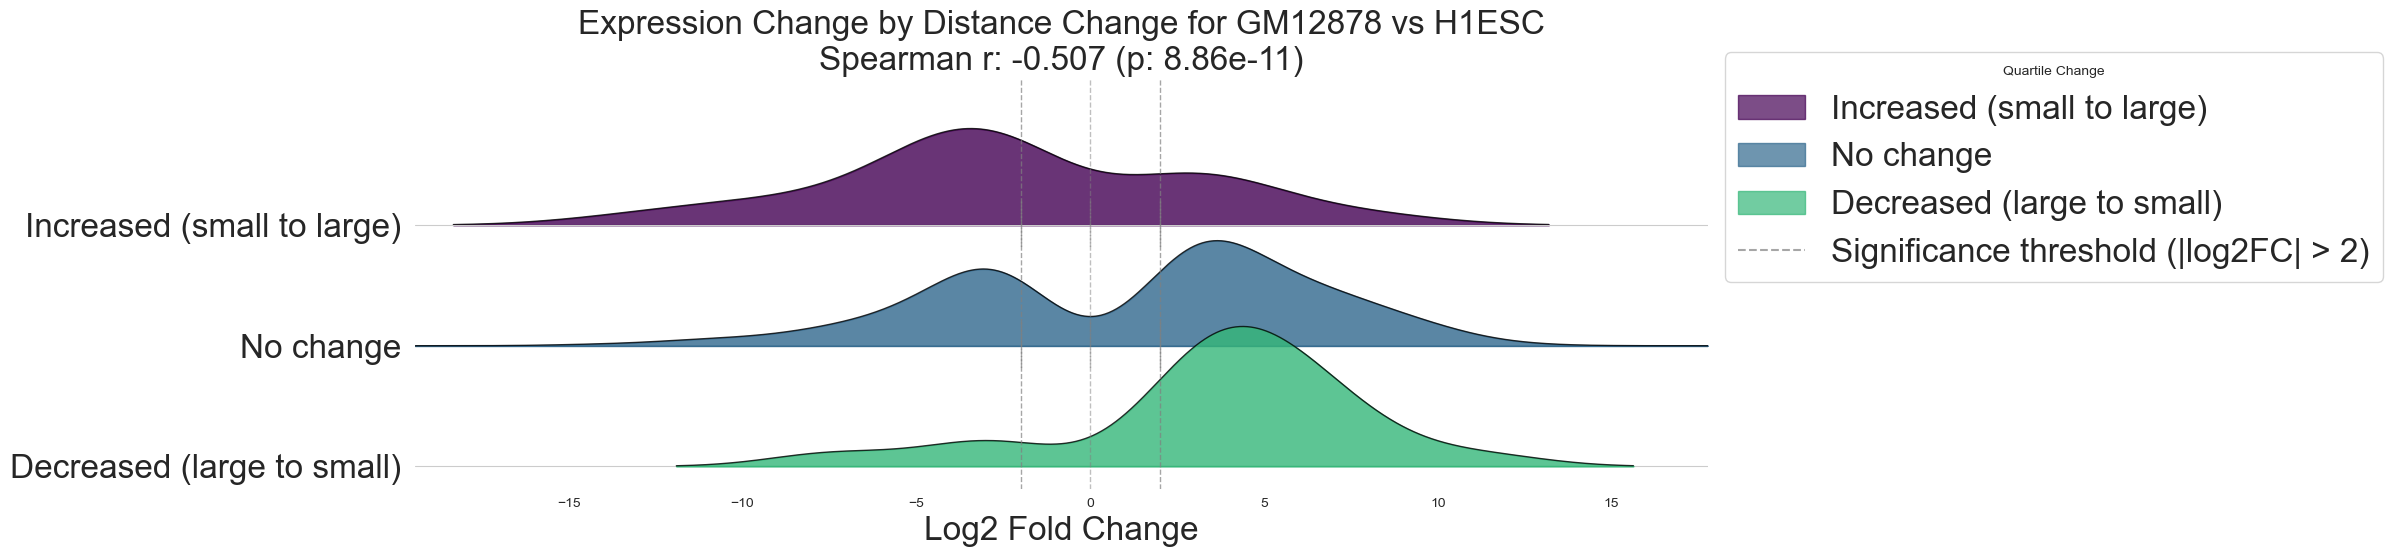

In [10]:
fig, corr_data = plot_distance_vs_expression_correlation(
    gm12878_gene_to_closest_avg_enhancer_all,
    h1esc_gene_to_closest_avg_enhancer_all,
    gm12878_vs_h1esc_results_df,
    "GM12878",
    "H1ESC",
    figsize=(15, 5),
    plot_path="figs/exp4_gm_h1_joy.png"
)
plt.show()

Spearman r: -0.550, p-value: 6.69e-13


/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/4279534050.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(label, fontsize=font_size)


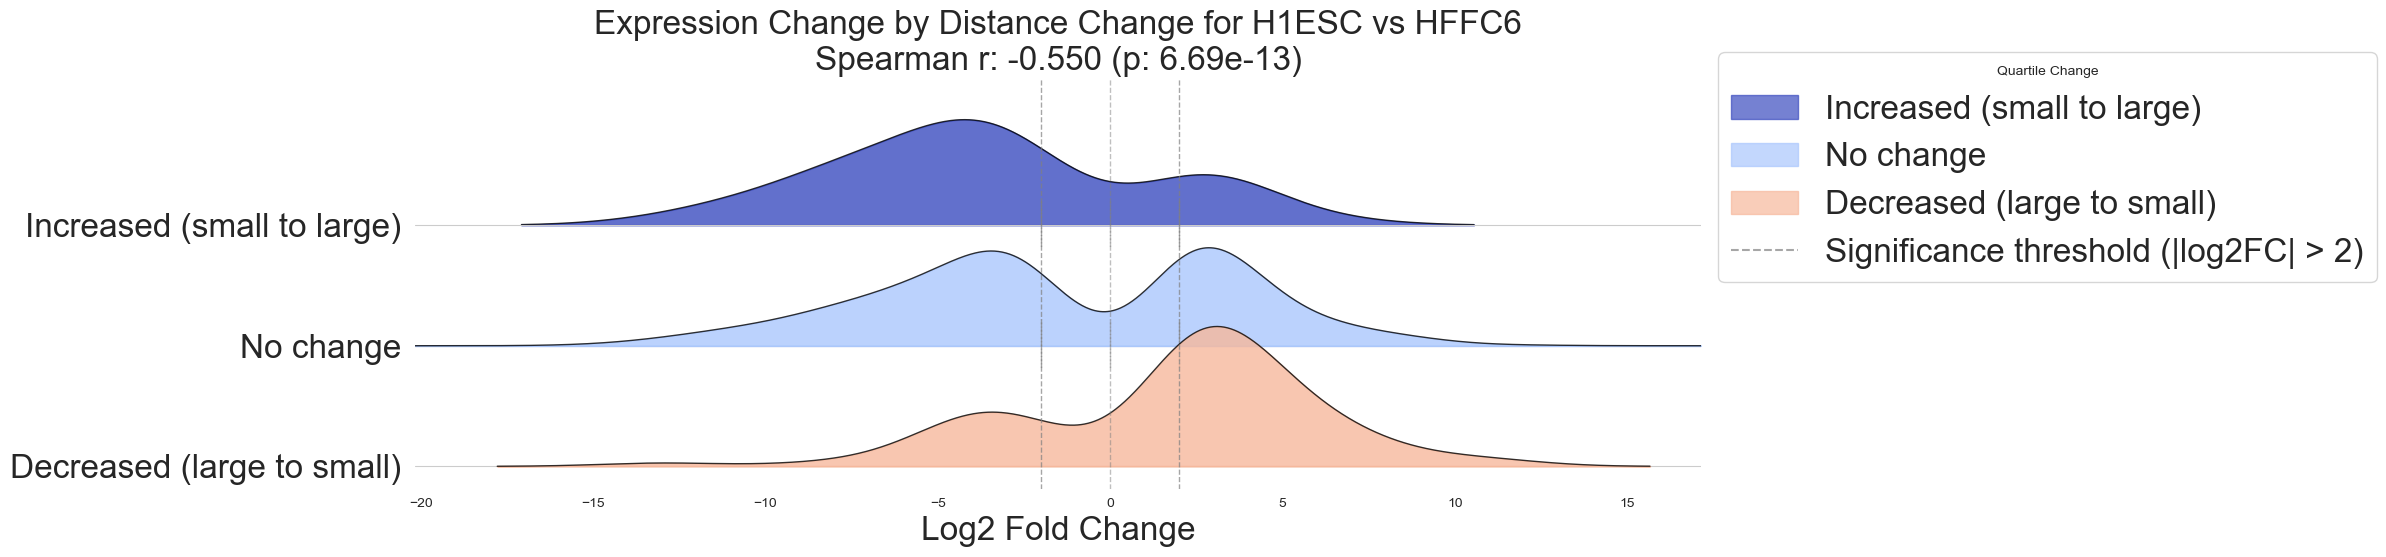

In [11]:
fig, corr_data = plot_distance_vs_expression_correlation(
    h1esc_gene_to_closest_avg_enhancer_all,
    hffc6_gene_to_closest_avg_enhancer_all,
    h1esc_vs_hffc6_results_df,
    "H1ESC",
    "HFFC6",
    figsize=(15, 5),
    plot_path="figs/exp4_h1_hffc_joy.png",
    color_map=cm.coolwarm
)

plt.show()

Spearman r: -0.644, p-value: 5.36e-16


/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/4279534050.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(label, fontsize=font_size)


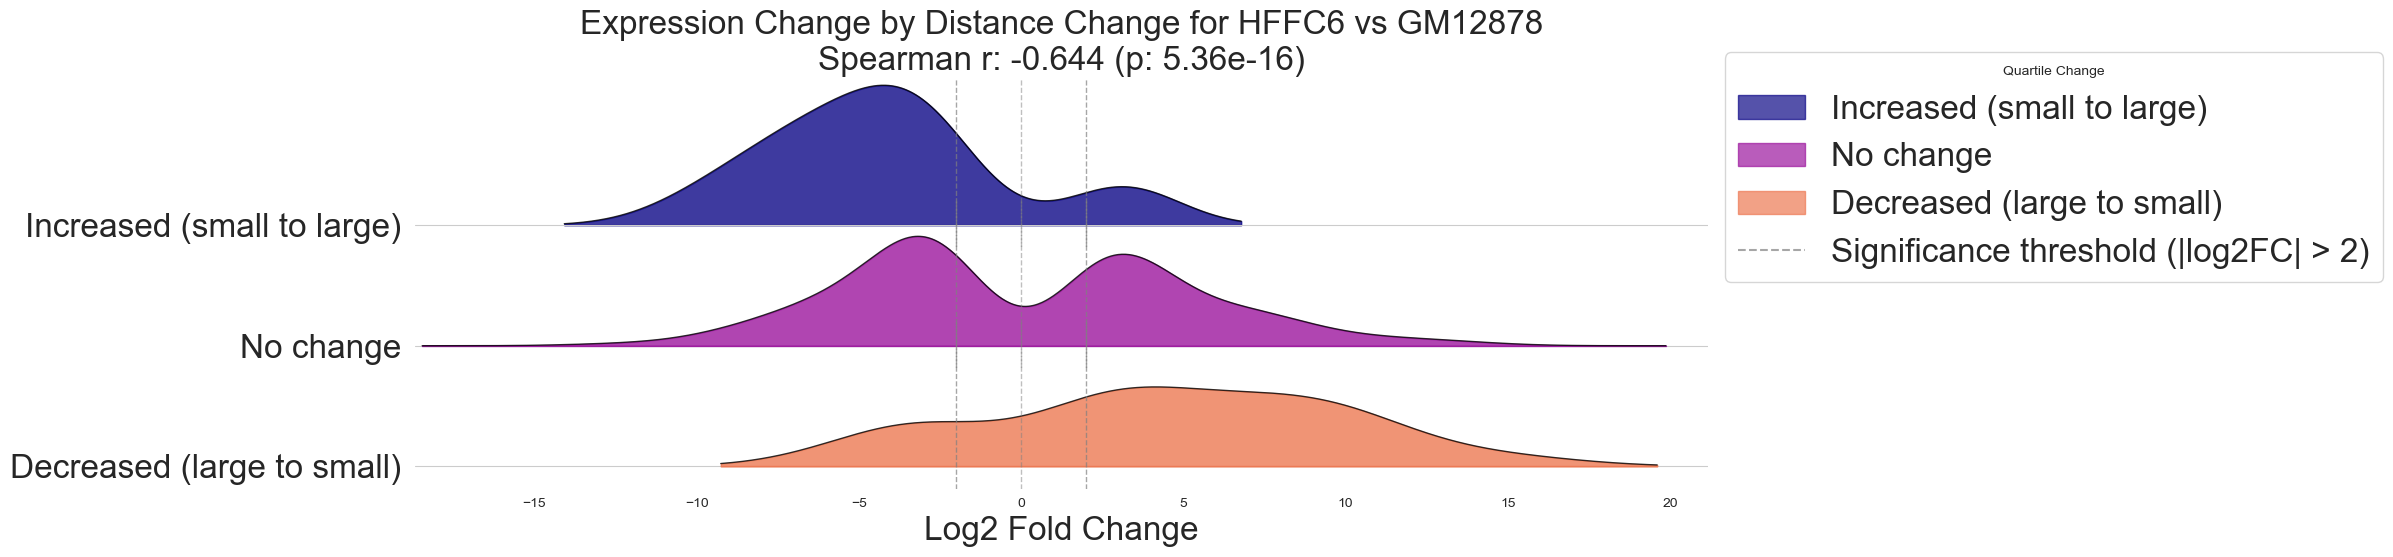

In [12]:
fig, corr_data = plot_distance_vs_expression_correlation(
    hffc6_gene_to_closest_avg_enhancer_all,
    gm12878_gene_to_closest_avg_enhancer_all,
    hffc6_vs_gm12878_results_df,
    "HFFC6",
    "GM12878",
    figsize=(15, 5),
    plot_path="figs/exp4_hffc_gm_joy.png",
    color_map=cm.plasma
)

plt.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from gprofiler import GProfiler

gp = GProfiler(
    user_agent='enhancer3d',
    return_dataframe=True,
)

def get_genes_from_2_cell_lines(
    cell1_distances_df,
    cell2_distances_df,
    deseq_results_df,
    cell1_name,
    cell2_name,
    log2fc_threshold=2,
    padj_threshold=0.05
):
    deseq_results_df = deseq_results_df.copy()

    deseq_results_df.index = deseq_results_df.index.str.split('.').str[0]

    deseq_results_df = deseq_results_df[
        (deseq_results_df["padj"] < padj_threshold)
        & (deseq_results_df["log2FoldChange"].abs() > log2fc_threshold)
    ]

    cell1_distances_df = cell1_distances_df.copy()
    cell1_distances_df['norm_min_dist'] = (
        (cell1_distances_df['min_dist'] - cell1_distances_df['min_dist'].min()) / (cell1_distances_df['min_dist'].max() - cell1_distances_df['min_dist'].min())
    )

    cell2_distances_df = cell2_distances_df.copy()
    cell2_distances_df['norm_min_dist'] = (
        (cell2_distances_df['min_dist'] - cell2_distances_df['min_dist'].min()) / (cell2_distances_df['min_dist'].max() - cell2_distances_df['min_dist'].min())
    )

    combined_df = cell1_distances_df.merge(
        cell2_distances_df,
        left_index=True,
        right_index=True,
        how="inner",
        suffixes=(f"_{cell1_name}", f"_{cell2_name}")
    )

    combined_df["log_dist_ratio"] = np.log2(combined_df[f"min_dist_{cell1_name}"] / combined_df[f"min_dist_{cell2_name}"])
    combined_df["dist_diff"] = combined_df[f"min_dist_{cell1_name}"] - combined_df[f"min_dist_{cell2_name}"]

    combined_df["norm_dist_diff"] = combined_df[f"norm_min_dist_{cell1_name}"] - combined_df[f"norm_min_dist_{cell2_name}"]
    combined_df["log_norm_dist_ratio"] = np.log2(combined_df[f"norm_min_dist_{cell1_name}"] / combined_df[f"norm_min_dist_{cell2_name}"])

    def get_link_change(row):
        if row[f"has_link_{cell1_name}"] and not row[f"has_link_{cell2_name}"]:
            return f"Only {cell1_name}"
        elif not row[f"has_link_{cell1_name}"] and row[f"has_link_{cell2_name}"]:
            return f"Only {cell2_name}"
        elif row[f"has_link_{cell1_name}"] and row[f"has_link_{cell2_name}"]:
            return "Both"
        else:
            return "Neither"

    combined_df["link_status"] = combined_df.apply(get_link_change, axis=1)

    def get_quartile_change(row):
        q1 = row[f"quartile_cat_{cell1_name}"]
        q2 = row[f"quartile_cat_{cell2_name}"]

        if q1 == q2:
            return "No change"

        categories = ["small", "mid", "large"]
        idx1 = categories.index(q1)
        idx2 = categories.index(q2)

        if idx1 > idx2:
            return f"Decreased ({q1} to {q2})"
        else:
            return f"Increased ({q1} to {q2})"

    combined_df["quartile_change"] = combined_df.apply(get_quartile_change, axis=1)

    merged_df = combined_df.merge(
        deseq_results_df[["log2FoldChange", "padj"]],
        left_index=True,
        right_index=True,
        how="inner"
    )

    merged_df_for_correlation = merged_df.copy()
    merged_df_for_correlation = merged_df_for_correlation[
        ~merged_df_for_correlation["quartile_change"].isin([
            "No change",
            "Increased (small to mid)",
            "Increased (mid to large)",
            "Decreased (large to mid)",
            "Decreased (mid to small)",
        ])
    ]

    merged_df_for_genes = merged_df.copy()
    cell_line_1_upregulated_jumper_genes = merged_df_for_genes[
        (merged_df_for_genes["log2FoldChange"] < -log2fc_threshold)
        # & (merged_df_for_genes["link_status"] == f"Only {cell1_name}")
        & (merged_df_for_genes["quartile_change"].isin([
            "Increased (small to large)",
            "Increased (mid to small)",
            "Increased (mid to large)",
        ]))
    ].index

    cell_line_2_upregulated_jumper_genes = merged_df_for_genes[
        (merged_df_for_genes["log2FoldChange"] > log2fc_threshold)
        # & (merged_df_for_genes["link_status"] == f"Only {cell2_name}")
        & (merged_df_for_genes["quartile_change"].isin([
            "Decreased (small to large)",
            "Decreased (mid to small)",
            "Decreased (mid to large)",
        ]))
    ].index

    gene_names_cell_line_1 = (
        gp
        .convert(
            organism='hsapiens',
            query=cell_line_1_upregulated_jumper_genes.tolist(),
        )
        [['converted', 'name']]
        .set_index('converted', drop=True)
    )

    gene_names_cell_line_2 = (
        gp
        .convert(
            organism='hsapiens',
            query=cell_line_2_upregulated_jumper_genes.tolist(),
        )
        [['converted', 'name']]
        .set_index('converted', drop=True)
    )

    return gene_names_cell_line_1['name'].tolist(), gene_names_cell_line_2['name'].tolist(), merged_df_for_genes

In [14]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import seaborn as sns
from textwrap import wrap
import gseapy

def get_enrichment_results(gene_list, gene_sets):
    enr = gseapy.enrichr(
        gene_list=gene_list,
        gene_sets=gene_sets,
        organism='Human',
        outdir=None,
        cutoff=0.05
    )

    results = enr.results[['Term', 'P-value', 'Adjusted P-value', 'Overlap', 'Combined Score', 'Genes']]
    results = results.sort_values(by='Combined Score', ascending=False).head(10)
    results['Genes Ratio'] = results['Genes'].apply(lambda x: len(x.split(';')) / len(gene_list))
    results['Genes Number'] = results['Genes'].apply(lambda x: len(x.split(';')))
    return results.reset_index(drop=True)

def dotplot(
    results,
    figsize=(15, 8),
    fontsize=24,
    title="Enrichment Results",
    xlabel="Combined Score",
    ylabel="Term",
    plot_path=None,
    palette=sns.mpl_palette("spring", as_cmap=True)
):
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(
        data=results,
        x='Combined Score',
        y='Term',
        hue='Adjusted P-value',
        hue_norm=(0, 1),
        palette=palette,
        ax=ax,
        legend=False,
    )

    norm = Normalize(vmin=0, vmax=1)
    sm = ScalarMappable(cmap=palette, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, label='Adjusted P-value', shrink=0.8)
    cbar.ax.tick_params(labelsize=fontsize-2)
    cbar.set_label('Adjusted P-value', fontsize=fontsize, labelpad=10)

    # handles, labels = ax.get_legend_handles_labels()
    # size_legend = ax.legend(
    #     handles=handles[:len(handles)//2],
    #     labels=labels[:len(labels)//2],
    #     title='Combined Score',
    #     bbox_to_anchor=(1.05, 1),
    #     loc='upper left',
    #     fontsize=fontsize-2,
    #     title_fontsize=fontsize
    # )


    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)

    ax.tick_params(axis='y', which='major', labelsize=fontsize // 1.5)
    # force y-axis labels to be wrapped
    ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsize // 2)

    ax.tick_params(axis='x', which='major', labelsize=fontsize // 1.5)

    plt.tight_layout()
    if plot_path:
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    return fig

In [15]:
_, h1esc_genes, _ = get_genes_from_2_cell_lines(
    gm12878_gene_to_closest_avg_enhancer_all,
    h1esc_gene_to_closest_avg_enhancer_all,
    gm12878_vs_h1esc_results_df,
    "GM12878",
    "H1ESC",
    log2fc_threshold=2,
    padj_threshold=0.05
)

/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsize // 2)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsize // 2)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsiz

H1ESC upregulated jumper genes:
ZNF219
CNIH2
HCN2
PCDHGB7
GAL3ST3
KDF1
SLC39A14
DNAH3
SYNGAP1
CYP2S1
TMEM92
PCDHGA4
GNB3
DOCK5
TTLL6
TNNC1
ARHGAP23
NRTN
GALNT16
CA14
HPSE2
ISYNA1
RAB15
ZBTB3
ZSCAN10
C16orf96
NR6A1
PDE4DIP
MOB3B
TMEM184A
TMC4
PPP1R3B
TTBK1
ZNF853
NHSL1
SESN1
CHST3
KANK3
ZNF608
ZNF582
DNAH14
PRR5-ARHGAP8
MMP23B
MTMR11
SMIM1
ZNF462
SYNE4
EPN2
NKAIN3
PLAC9
ASPH
PITPNM3
U2AF1
ERVH48-1


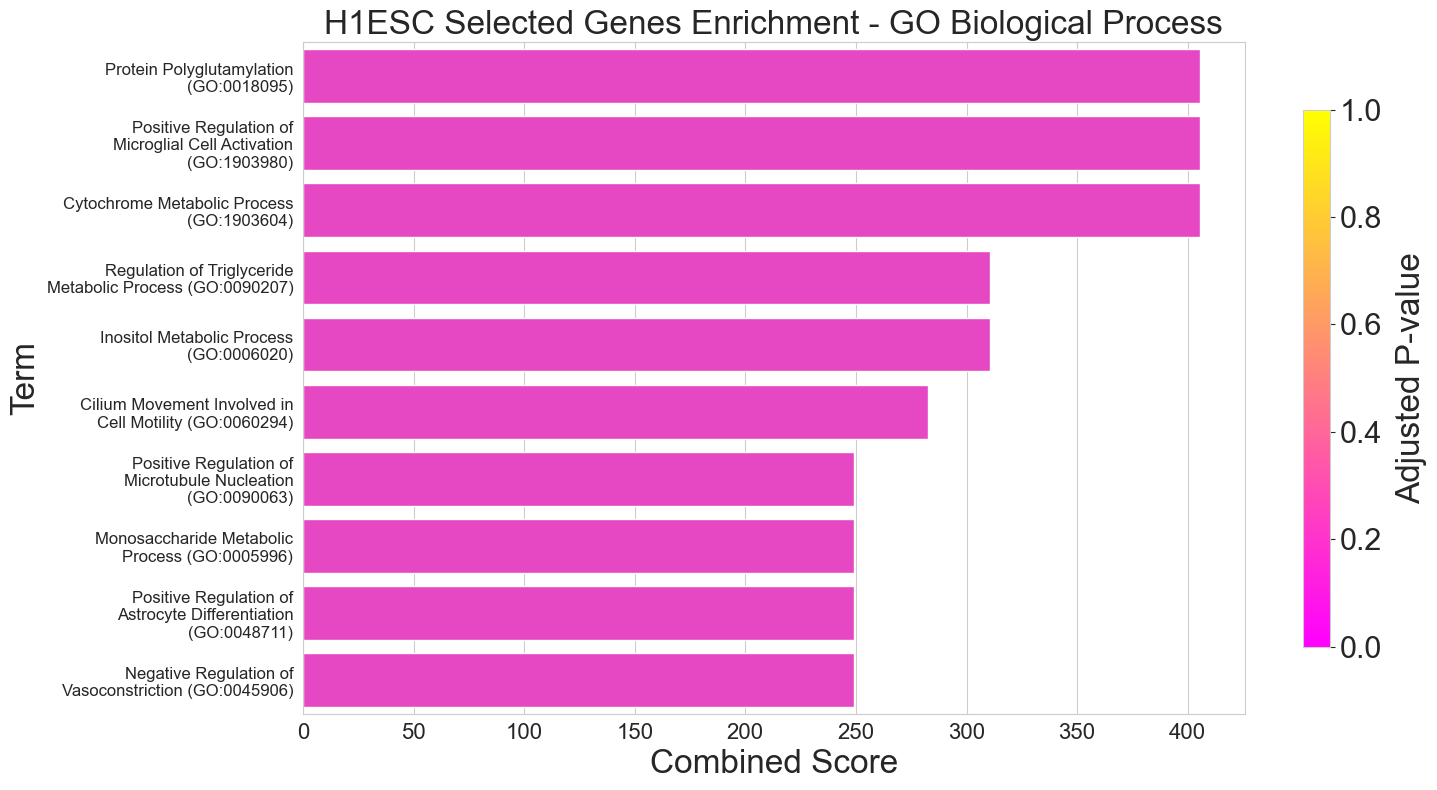

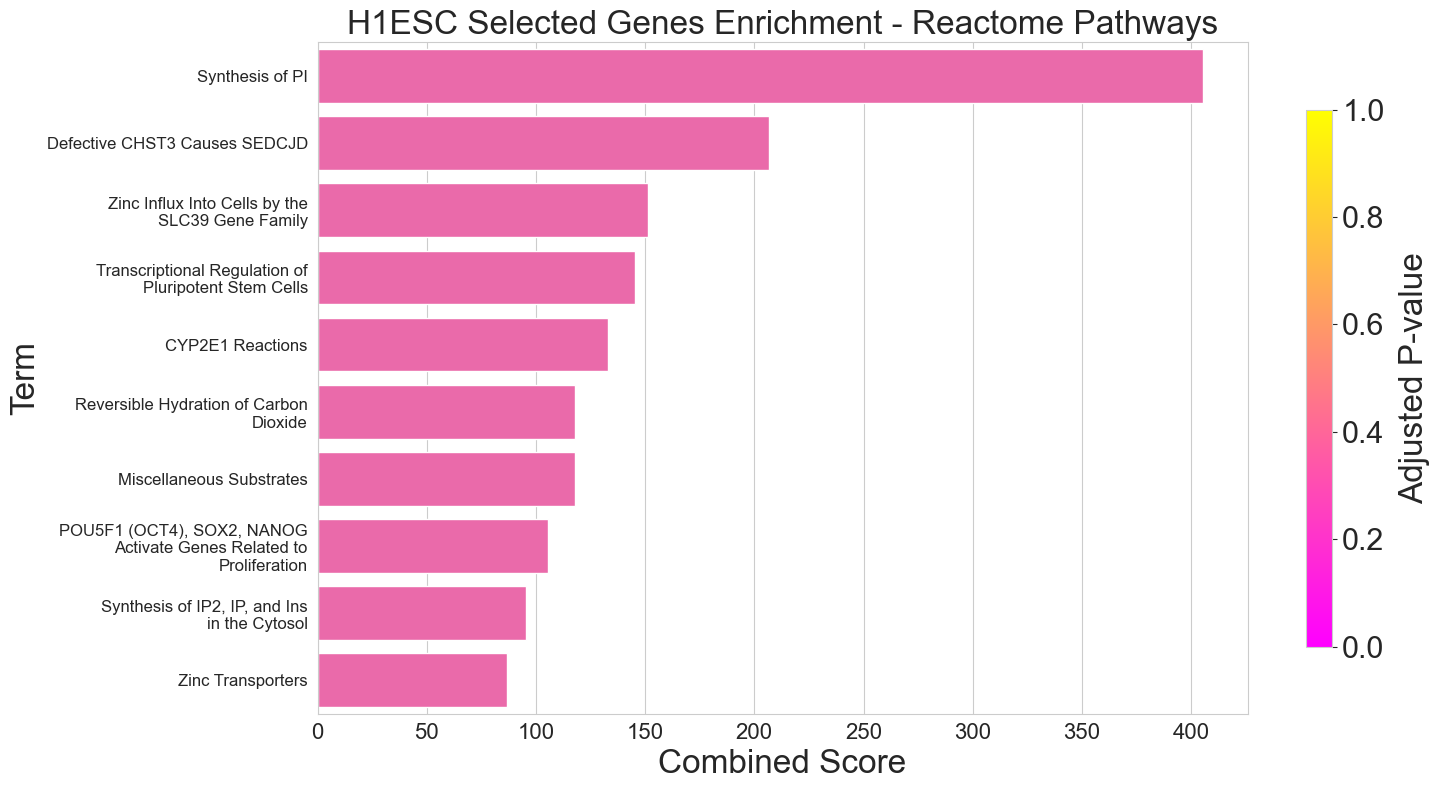

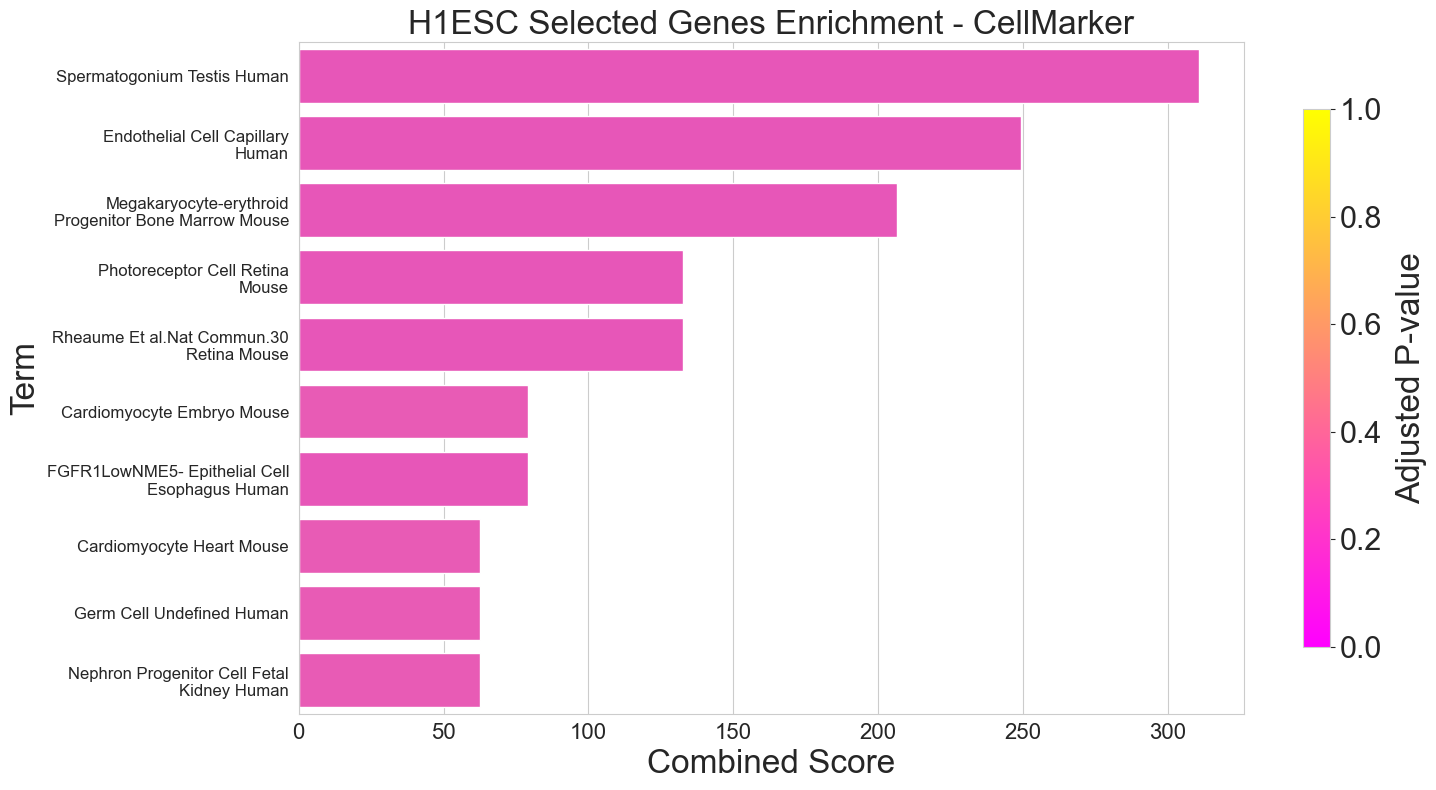

In [16]:
dotplot(get_enrichment_results(h1esc_genes, gene_sets='GO_Biological_Process_2025'), title="H1ESC Selected Genes Enrichment - GO Biological Process",
        plot_path="figs/exp4_h1esc_enrichment_go.png")
dotplot(get_enrichment_results(h1esc_genes, gene_sets='Reactome_Pathways_2024'), title="H1ESC Selected Genes Enrichment - Reactome Pathways",
        plot_path="figs/exp4_h1esc_enrichment_reactome.png")
dotplot(get_enrichment_results(h1esc_genes, gene_sets='CellMarker_2024'), title="H1ESC Selected Genes Enrichment - CellMarker",
        plot_path="figs/exp4_h1esc_enrichment_cellmarker.png")
print("H1ESC upregulated jumper genes:")
print("\n".join(h1esc_genes))

In [17]:
_, hffc6_genes, _ = get_genes_from_2_cell_lines(
    h1esc_gene_to_closest_avg_enhancer_all,
    hffc6_gene_to_closest_avg_enhancer_all,
    h1esc_vs_hffc6_results_df,
    "H1ESC",
    "HFFC6",
    log2fc_threshold=2,
    padj_threshold=0.05
)

/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsize // 2)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsize // 2)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsiz

HFFC6 upregulated jumper genes:
EGFLAM
OSMR
IL11RA
RUSC2
PLXNA2
TWIST2
DHRS1
PRELP
GRINA
FADS3
PDGFRB
ANXA6
S100A11
LOXL4
PYROXD2
SSBP4
TGFB3
LDHA
HLA-E
MMP14
BAHCC1
PCDHGA12
SUN2
ARSA
COPG1
GDF15
FAM24B
WIPI1
PCDHGC5
CAMTA2
ATL3
BEND6
EPHA2
CARD9
SPARC
PAPPA
PDLIM7
CCBE1
CLTB
TP53INP2
CNIH3
SYTL3
TANC2
CDC42EP5
COL5A1
BAG3
FBRS
RTN4
TLR6
KIFC3
PCYT1A
CTF1
SSC5D
LGALS8
RAI1
JUN
SIRPA
PAX3
ERCC6
P4HA1
SIM1
SH3RF1
ARHGAP31
PLEKHA2
ANXA5
ENOX1
DUSP10


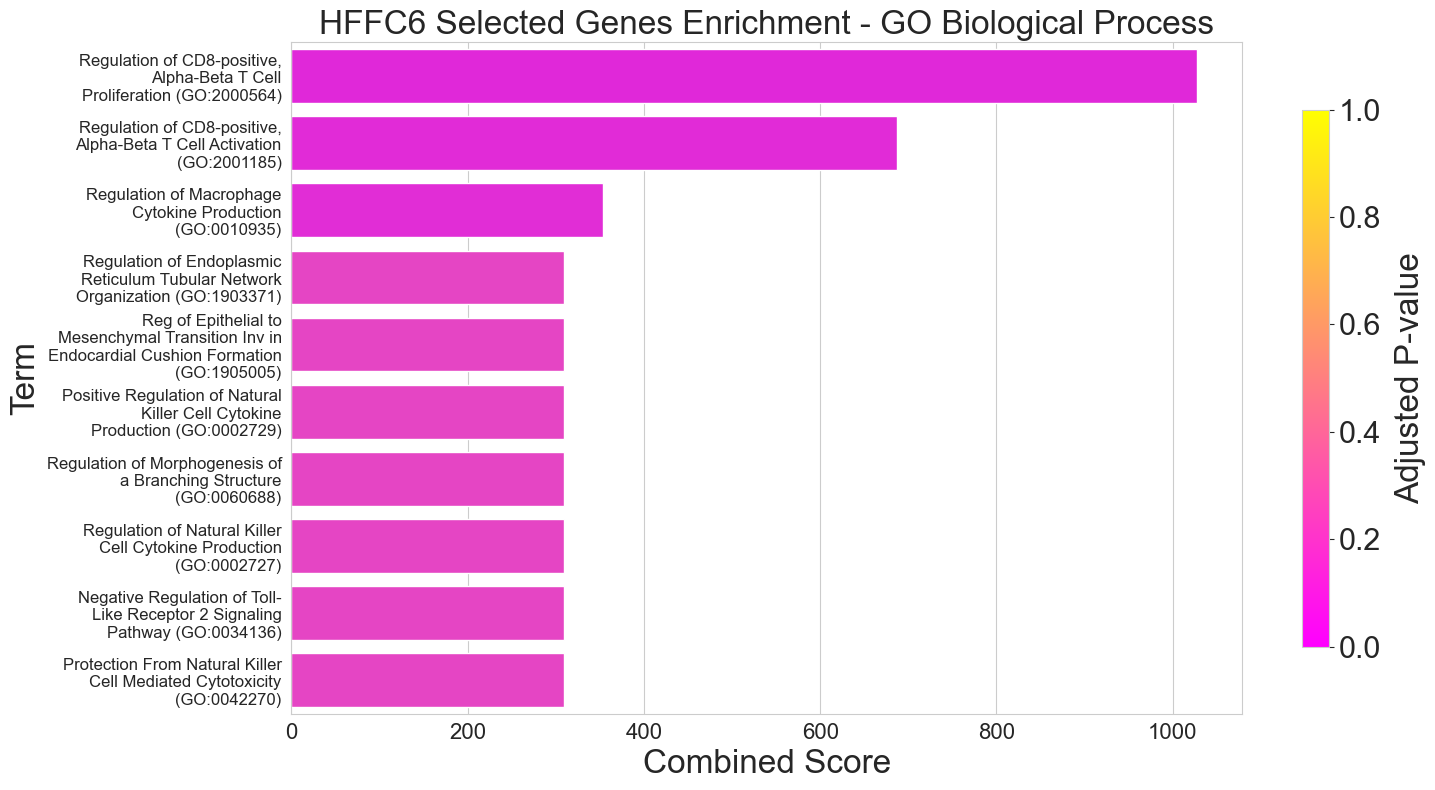

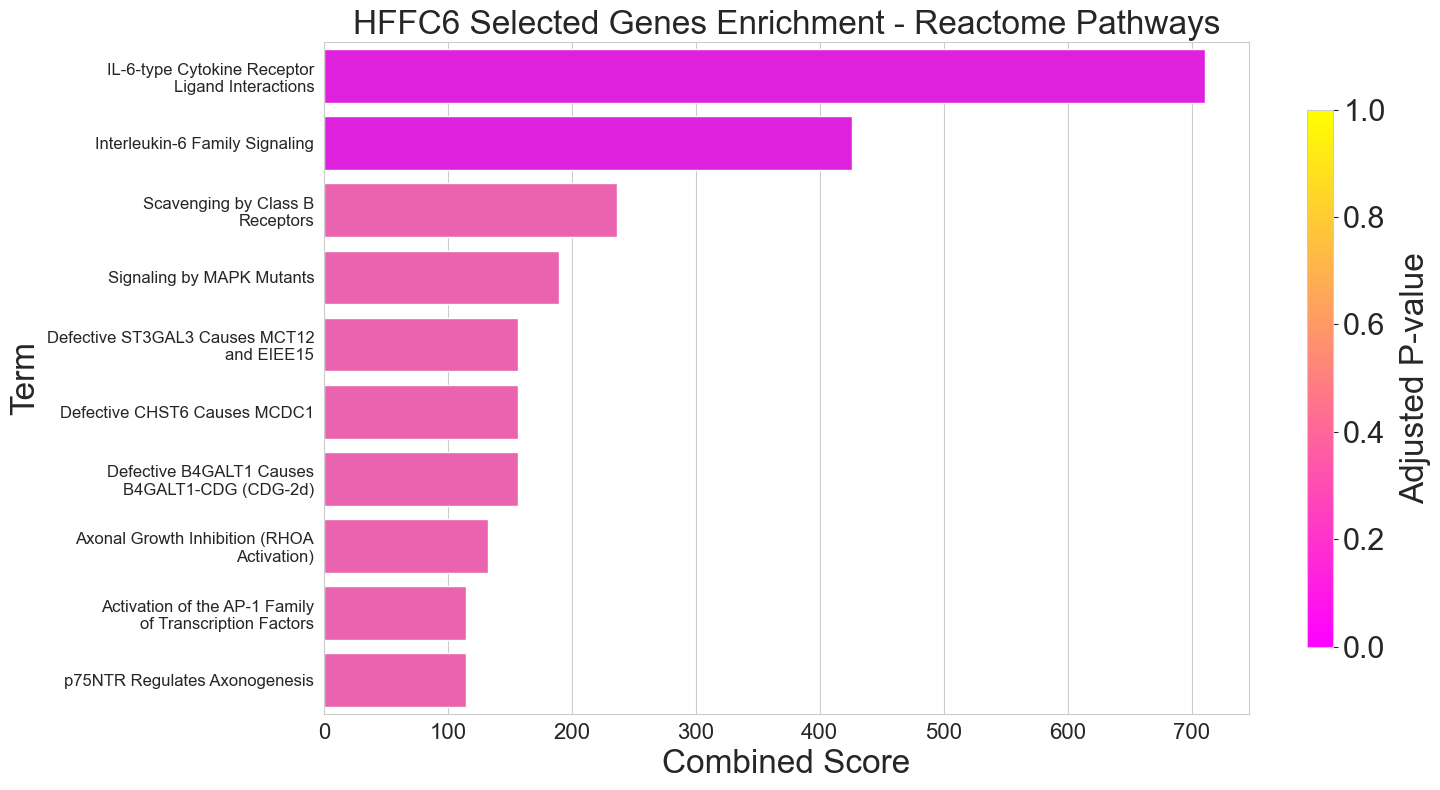

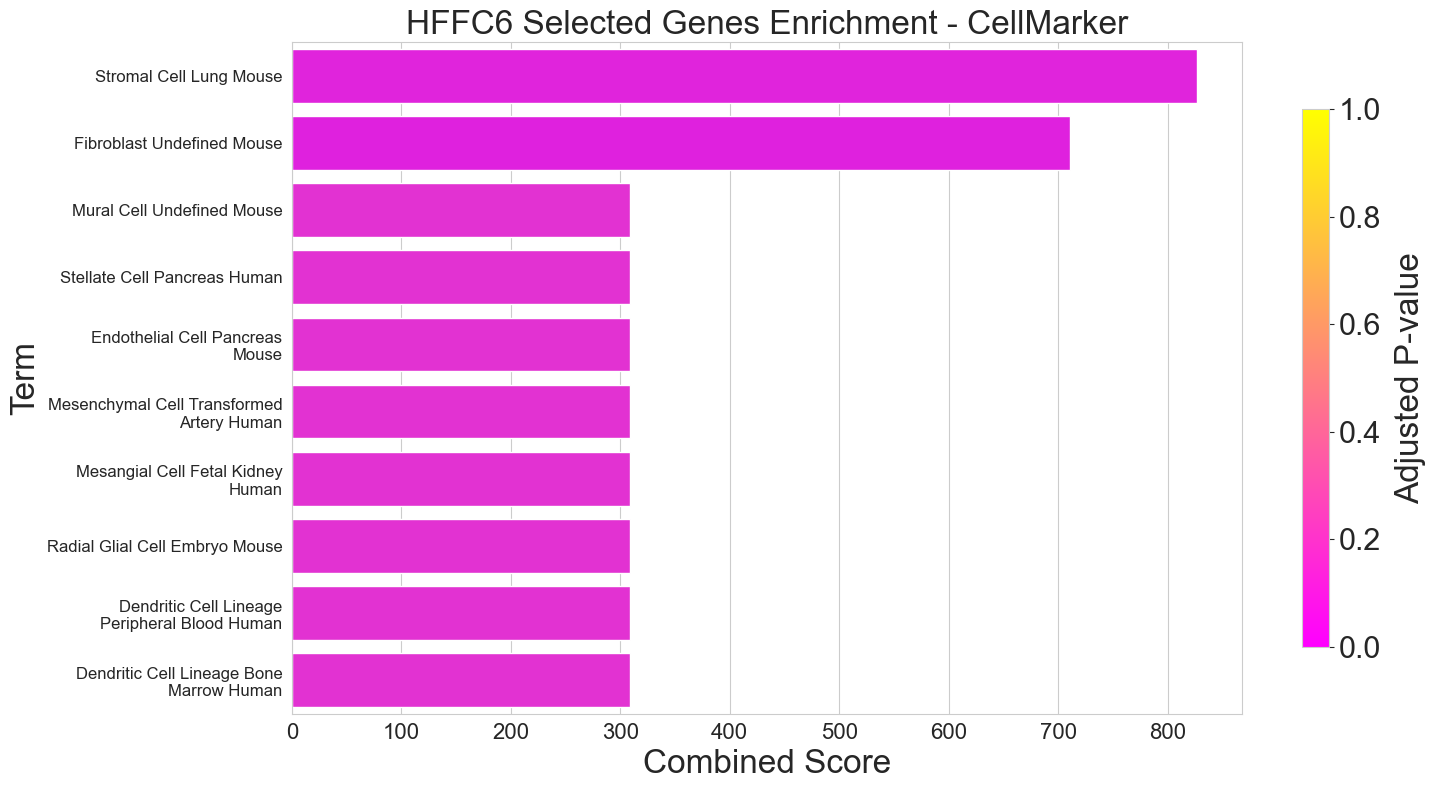

In [18]:
dotplot(get_enrichment_results(hffc6_genes, gene_sets='GO_Biological_Process_2025'), title="HFFC6 Selected Genes Enrichment - GO Biological Process",
        plot_path="figs/exp4_hffc6_enrichment_go.png")
dotplot(get_enrichment_results(hffc6_genes, gene_sets='Reactome_Pathways_2024'), title="HFFC6 Selected Genes Enrichment - Reactome Pathways",
        plot_path="figs/exp4_hffc6_enrichment_reactome.png")
dotplot(get_enrichment_results(hffc6_genes, gene_sets='CellMarker_2024'), title="HFFC6 Selected Genes Enrichment - CellMarker",
        plot_path="figs/exp4_hffc6_enrichment_cellmarker.png")
print("HFFC6 upregulated jumper genes:")
print("\n".join(hffc6_genes))

In [19]:
_, gm12878_genes, _ = get_genes_from_2_cell_lines(
    hffc6_gene_to_closest_avg_enhancer_all,
    gm12878_gene_to_closest_avg_enhancer_all,
    hffc6_vs_gm12878_results_df,
    "HFFC6",
    "GM12878",
    log2fc_threshold=2,
    padj_threshold=0.05
)

/opt/anaconda3/envs/enhancer3D/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsize // 2)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsize // 2)
/var/folders/ss/9hx8q7517rzf6x75cfny7ndc0000gp/T/ipykernel_67489/194747513.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['\n'.join(wrap(label.get_text(), width=30)) for label in ax.get_yticklabels()], fontsize=fontsiz

GM12878 upregulated jumper genes:
LLGL2
NCR3
AP1G2
HINT2
MSH5
SLC7A7
VASH2
MYCBPAP
SIT1
FCMR
ITGB7
THEMIS2
SLFN12L
TRAF3IP3
TAPBPL
PSME2
CCDC69
APOA1
CD27
HMGCS1
IL23R
PITPNC1
MKNK2
RHOF
FAM111B
CRYM
EDN2
ASB2
MYO1G
IL12RB1
PATL2
RNF157
MAP3K8
FAM221A
CDH23
NCF2
SYNGR3
TP73
NFATC1
DOK3
TNFAIP8
ITPRIPL1
EVI2B


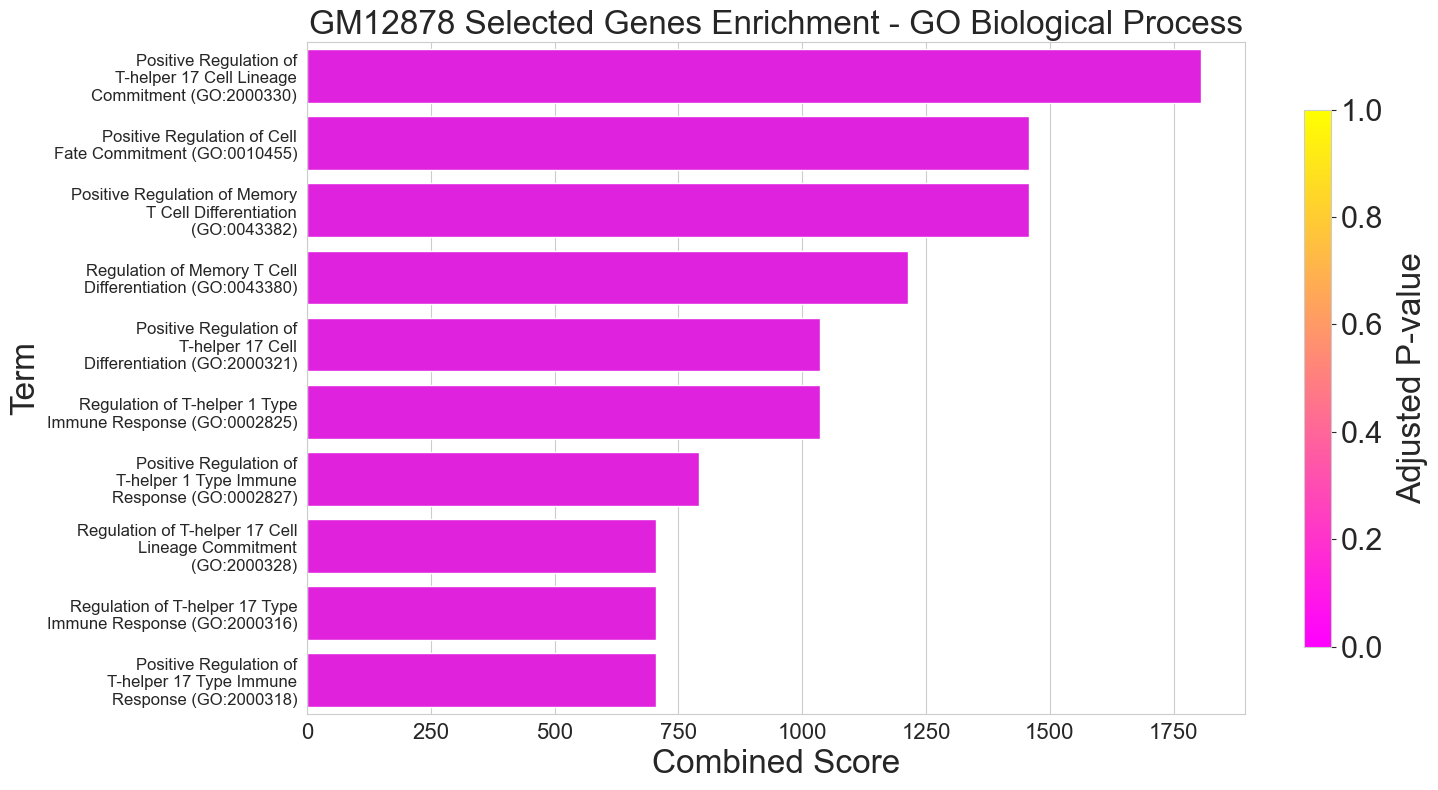

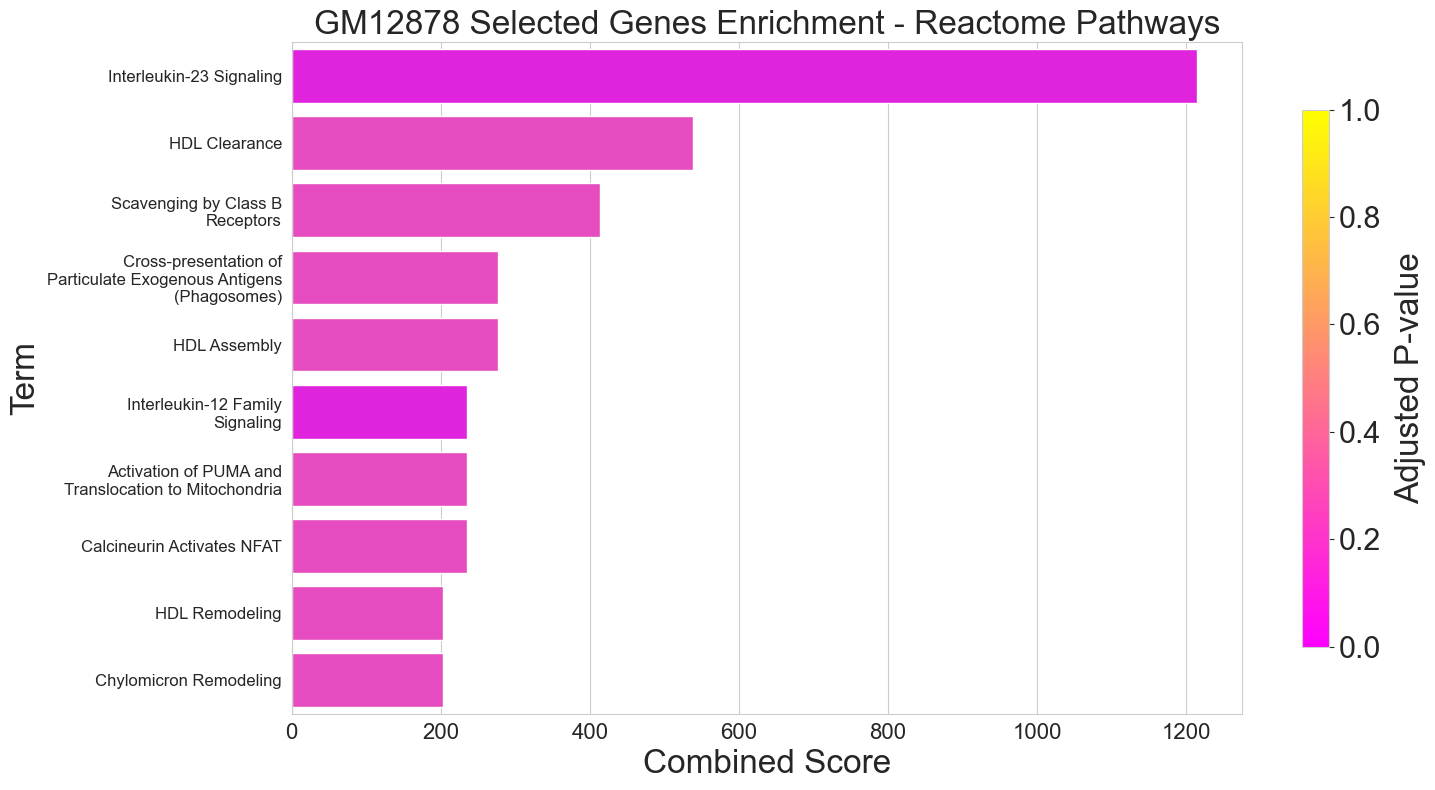

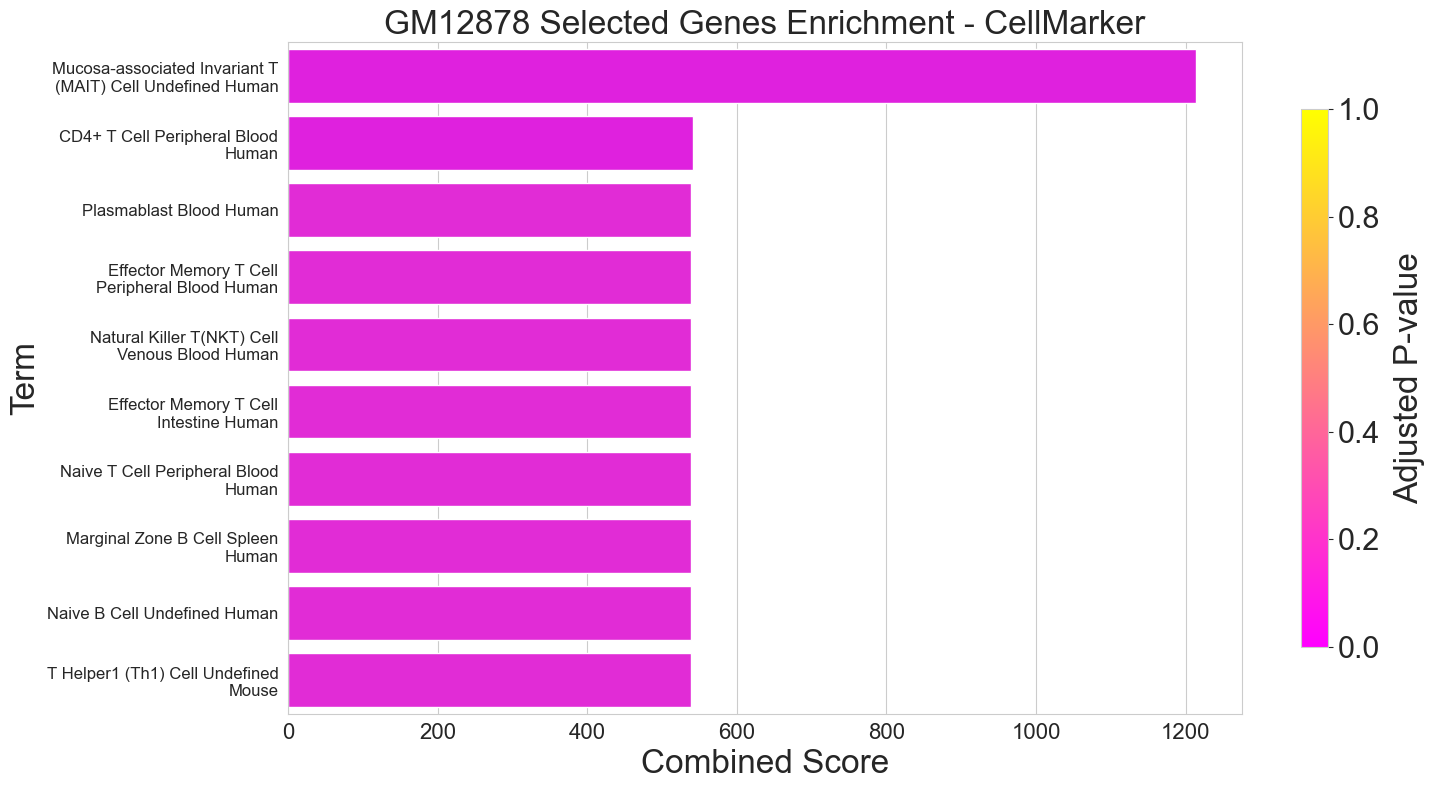

In [20]:
dotplot(get_enrichment_results(gm12878_genes, gene_sets='GO_Biological_Process_2025'), title="GM12878 Selected Genes Enrichment - GO Biological Process", plot_path="figs/exp4_gm12878_enrichment_go.png")
dotplot(get_enrichment_results(gm12878_genes, gene_sets='Reactome_Pathways_2024'), title="GM12878 Selected Genes Enrichment - Reactome Pathways", plot_path="figs/exp4_gm12878_enrichment_reactome.png")
dotplot(get_enrichment_results(gm12878_genes, gene_sets='CellMarker_2024'), title="GM12878 Selected Genes Enrichment - CellMarker", plot_path="figs/exp4_gm12878_enrichment_cellmarker.png")
print("GM12878 upregulated jumper genes:")
print("\n".join(gm12878_genes))